**Student names**: Uriel Baldesco, Kaelyn Taing, Lisette Gonzalez

**Project Description**: Our project will use a classification model that utilizes logistic regression to take from a dataset which pulls social media comments, customer reviews etc. from social media sites (reddit, twitter, etc.). The model should be able to determine whether a comment is positive, neutral, or negative.

**Project Goals**: Our project goal of this dataset is to classify the sentiment of various social media comments, customer reviews, etc. from various social media platforms into three categories: Positive, Negative, and Neutral.

**Dataset Description**: Our dataset comes from Kaggle and contains data from social media comments, customer reviews, etc. The dataset was collected from Social Media Platforms such as Reddit, Twitter, etc. The columns in the dataset include Post ID, Post Content, Sentiment Label, Number of Likes, Number of Shares, Number of Comments, User Follower Count, User Account Age (days), Post Data and Time, Post Type, Hashtags, Mentions, Language. The label is the ‘Sentiment Label’ column and the feature is 'Post Content'.

OVERVIEW OF REQUIRED STEPS:



1.   Import Packages
2.   Build DataFrame, Define Label, Identify Features
3. Vectorize
4. Model
5. Feature Importance and Evaluation



# STEP 1: Import Packages

In [4]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

# STEP 2: BUILD DATAFRAME, DEFINE ML PROBLEM, CLEAN DATA


*   Define the Label: 'Sentiment Label'
*   Identify Features: ‘Post Data and Time’, ‘Number of Likes’, ‘Number of Shares’, ‘Number of Comments’

CONCERNS:
* The column post type should be converted into numerical values using one hot encoding
* does sentiment label column need to converted into numerical values?

TODO:
* still need to finish this step by cleaning the data using lemmatization, stop word removal, and n-gram creation

In [9]:
train = pd.read_csv('content/Train.csv')
test = pd.read_csv('content/Test.csv')
print("Training Dataset:")
print(train.head())
print("\nTest Dataset:")
print(test.head())
train.describe(include='all')


Training Dataset:
   Id                                               Body Sentiment Type
0   1  rule 2 no metes about polarizing political top...        neutral
1   2                                                NaN        neutral
2   3  no politics danger now i can make a propaganda...       negative
3   4                       i am the senate gets stabbed        neutral
4   5                                  is this a suicide        neutral

Test Dataset:
   Id                                               Body
0   1  rule 2 no metes about polarizing political top...
1   2                                                NaN
2   3  no politics danger now i can make a propaganda...
3   4                       i am the senate gets stabbed
4   5                                  is this a suicide


,Id,Body,Sentiment Type
count,2000.000000,1772,2000
unique,NaN,1744,3
top,NaN,delete,neutral
freq,NaN,4,1010
mean,1000.500000,NaN,NaN
std,577.494589,NaN,NaN
min,1.000000,NaN,NaN
25%,500.750000,NaN,NaN
50%,1000.500000,NaN,NaN
75%,1500.250000,NaN,NaN


**DATA CLEANING**


*   Drop the null and missing values
*   Check for imbalance in label classifications



In [12]:
train.isnull().sum()
train['Sentiment Type'].value_counts()
# Drop rows where any column has missing values
train = train.dropna()
test = test.dropna()

# Drop rows where specific column(s) have missing values
train = train.dropna(subset=['Body'])
test = test.dropna(subset=['Body'])

#STEP 3: VECTORIZE


In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_tfidf = tfidf_vectorizer.fit_transform(train['Body'])
X_test_tfidf = tfidf_vectorizer.transform(test['Body'])

# Show the shape of transformed data
print("\nTF-IDF feature matrix shape for training data:", X_train_tfidf.shape)
print("TF-IDF feature matrix shape for test data:", X_test_tfidf.shape)


TF-IDF feature matrix shape for training data: (1772, 5000)
TF-IDF feature matrix shape for test data: (1772, 5000)


# STEP 4: MODEL

*   Using Logistic Regression Algorithm we tested different values of C. C is a hyperparameter of logistic regression that represents the regularization or the complexity of the model. By testing with different values of C ranging from 0.01 to 100 we found that a C value of 10 outputted the best results without causing overfitting.
* Reducing C increases the simplicity of the model, however a C value of 0.01 caused the model to perform poorly. Thus, a C value of 10 (meaning we increased the complexity of the model) led to a better performance.



Predicted Probabilities for instance 1: [0.73074939 0.19009142 0.07915918]

Actual: Is this a good review? negative

Actual Class for instance 1: negative

Training Accuracy: 0.9988713318284425

Classification Report on Training Data:
              precision    recall  f1-score   support

    negative       1.00      1.00      1.00       358
     neutral       1.00      1.00      1.00       782
    positive       1.00      1.00      1.00       632

    accuracy                           1.00      1772
   macro avg       1.00      1.00      1.00      1772
weighted avg       1.00      1.00      1.00      1772



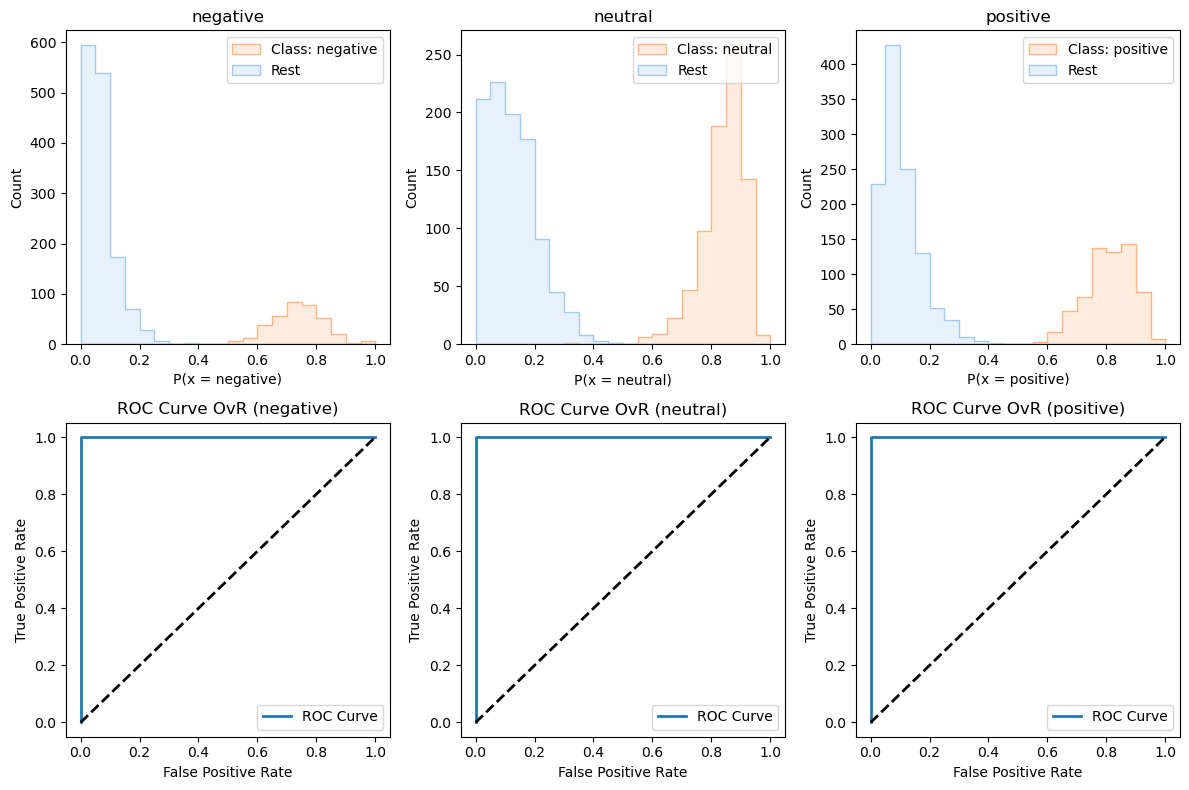

ROC AUC Scores (One-vs-Rest):
Class negative: 1.0000
Class neutral: 1.0000
Class positive: 1.0000


In [18]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import seaborn as sns

# Target variable
y_train = train['Sentiment Type']

#testing different values of C
C_values = [0.01, 0.1, 1, 10, 100]

#Logistic Regression
# for C in C_values:
#   model = LogisticRegression(C=C, max_iter=1000,random_state=42, multi_class='ovr')
#   model.fit(X_train_tfidf,y_train)
#   y_train_pred = model.predict(X_train_tfidf)
#   accuracy = accuracy_score(y_train, y_train_pred)
#   print(f"C: {C}, Accuracy: {accuracy:.4f}")
logreg_model = LogisticRegression(C=10, max_iter=1000, random_state=42, multi_class='ovr')
logreg_model.fit(X_train_tfidf,y_train)
y_train_pred = logreg_model.predict(X_train_tfidf)
accuracy = accuracy_score(y_train,y_train_pred)

# Predict on the training data to see initial accuracy
y_train_pred = logreg_model.predict(X_train_tfidf)
probability_predictions = logreg_model.predict_proba(X_train_tfidf)

print('\nPredicted Probabilities for instance 1: {}\n'.format(probability_predictions[1]))
print('Actual: Is this a good review? {}\n'.format(y_train_pred[1]))
print(f'Actual Class for instance 1: {y_train.iloc[1]}')

print("\nTraining Accuracy:", accuracy_score(y_train, y_train_pred))
print("\nClassification Report on Training Data:")
print(classification_report(y_train, y_train_pred))

#Evaluation for Logistic Regression -> multi-class classification uses one-vs-rest
def get_all_roc_coordinates(y_true, y_proba):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    return tpr, fpr

def plot_roc_curve(tpr, fpr, scatter=True, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.plot(fpr, tpr, label="ROC Curve", lw=2)
    if scatter:
        ax.scatter(fpr, tpr, s=10)
    ax.plot([0, 1], [0, 1], "k--", lw=2)  # Random guessing line
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.legend(loc="lower right")

y_proba = logreg_model.predict_proba(X_test_tfidf)
y_test = train['Sentiment Type']
classes = logreg_model.classes_
plt.figure(figsize=(12, 8))
bins = [i / 20 for i in range(20)] + [1]
roc_auc_ovr = {}
for i in range(len(classes)):
    c = classes[i]
    df_aux = test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop=True)
    ax = plt.subplot(2, 3, i + 1)
    sns.histplot(x="prob", data=df_aux, hue='class', palette="pastel", ax=ax, bins=bins, element="step")
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    ax_bottom = plt.subplot(2, 3, i + 4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter=False, ax=ax_bottom)
    ax_bottom.set_title(f"ROC Curve OvR ({c})")
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()
plt.show()
print("ROC AUC Scores (One-vs-Rest):")
for cls, auc_score in roc_auc_ovr.items():
    print(f"Class {cls}: {auc_score:.4f}")

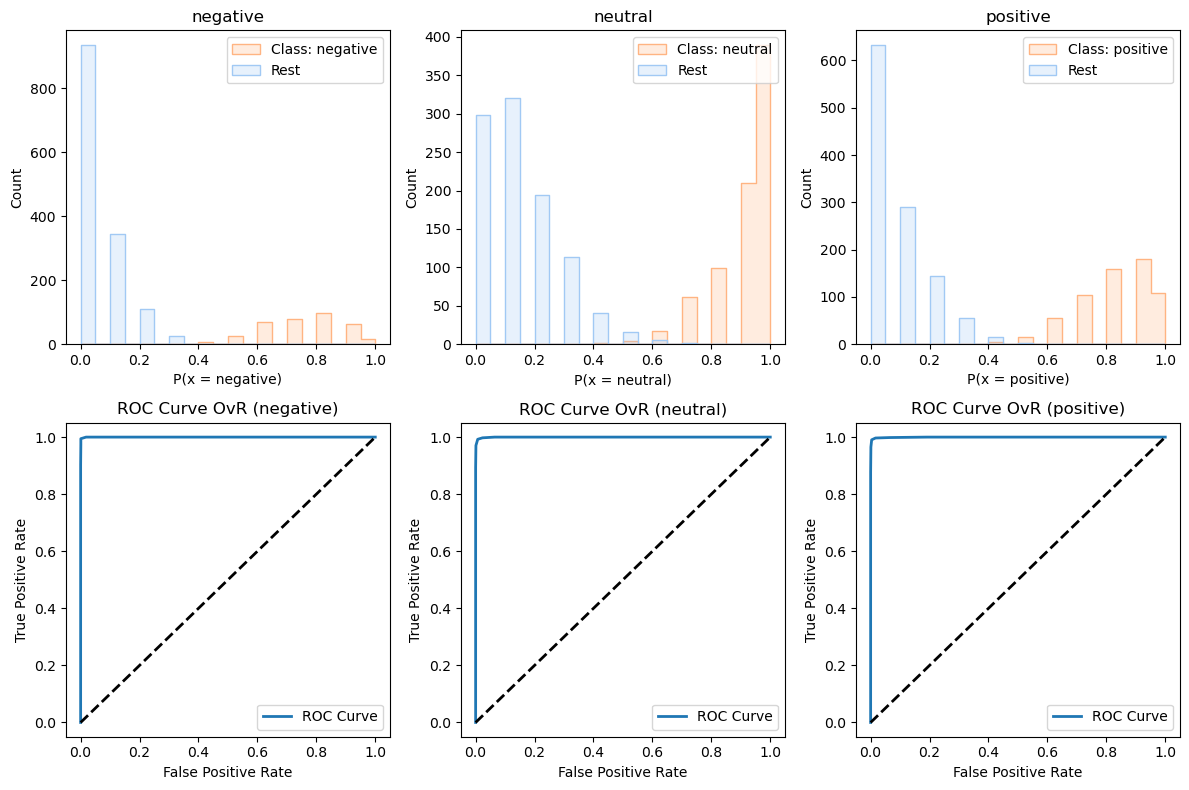

ROC AUC Scores (One-vs-Rest):
Class negative: 0.9999
Class neutral: 0.9997
Class positive: 0.9996


In [19]:
from sklearn.ensemble import RandomForestClassifier

n_estimators_values = [1,10,100]
criterion_types = ['gini','entropy','log_loss']

# for n in n_estimators_values:
#   for c in criterion_types:
#     randomforest_model = RandomForestClassifier(n_estimators=n, criterion=c)
#     randomforest_model.fit(X_train_tfidf,y_train)
#     y_train_pred = randomforest_model.predict(X_train_tfidf)
#     accuracy = accuracy_score(y_train,y_train_pred)
#     print(f"Random Forest Estimator: {n}, Criterion: {c}, Accuracy: {accuracy:.4f}")

randomforest_model = RandomForestClassifier(n_estimators=10,criterion='entropy')
randomforest_model.fit(X_train_tfidf,y_train)
y_train_pred = randomforest_model.predict(X_train_tfidf)
accuracy = accuracy_score(y_train,y_train_pred)

# Predict on the training data to see initial accuracy
probability_predictions = randomforest_model.predict_proba(X_train_tfidf)
#Evaluation for Random Forest -> multi-class classification uses one-vs-rest
def get_all_roc_coordinates(y_true, y_proba):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    return tpr, fpr

def plot_roc_curve(tpr, fpr, scatter=True, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.plot(fpr, tpr, label="ROC Curve", lw=2)
    if scatter:
        ax.scatter(fpr, tpr, s=10)
    ax.plot([0, 1], [0, 1], "k--", lw=2)  # Random guessing line
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.legend(loc="lower right")

y_proba = randomforest_model.predict_proba(X_test_tfidf)
y_test = train['Sentiment Type']
classes = randomforest_model.classes_
plt.figure(figsize=(12, 8))
bins = [i / 20 for i in range(20)] + [1]
roc_auc_ovr = {}
for i in range(len(classes)):
    c = classes[i]
    df_aux = test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop=True)
    ax = plt.subplot(2, 3, i + 1)
    sns.histplot(x="prob", data=df_aux, hue='class', palette="pastel", ax=ax, bins=bins, element="step")
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    ax_bottom = plt.subplot(2, 3, i + 4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter=False, ax=ax_bottom)
    ax_bottom.set_title(f"ROC Curve OvR ({c})")
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()
plt.show()
print("ROC AUC Scores (One-vs-Rest):")
for cls, auc_score in roc_auc_ovr.items():
    print(f"Class {cls}: {auc_score:.4f}")

**Random Forest Classifier Hyperparameters**
* Random Forest Classifier allows you to adjust n_estimators, the number of trees in the forest, and criterion, the function that measures the quality of the split
*   I ran the random forest classifier against different values for n_estimators and against 3 criterion types. The n_estimator value and the criterion type that gave the best accuracy without overfitting is ***n_estimator=10 and a criterion type = entropy***



In [21]:
from sklearn.neighbors import KNeighborsClassifier

# KNN

values = [1, 3, 5, 7, 9, 11]

for v in values:
  knnmodel = KNeighborsClassifier(n_neighbors=v)
  knnmodel.fit(X_train_tfidf,y_train)
  y_train_pred = knnmodel.predict(X_train_tfidf)
  accuracy = accuracy_score(y_train, y_train_pred)
  print(f"n_neighbors: {v}, Accuracy: {accuracy:.4f}")

# Predict on the training data to see initial accuracy
y_train_pred = knnmodel.predict(X_train_tfidf)
probability_predictions = knnmodel.predict_proba(X_train_tfidf)

# probability_predictions = model.predict_proba(X_test_tfidf)
print('\nPredicted Probabilities for instance 1: {}\n'.format(probability_predictions[1]))
print('Actual: Is this a good review? {}\n'.format(y_train_pred[1]))
print(f'Actual Class for instance 1: {y_train.iloc[1]}')

print("\nTraining Accuracy:", accuracy_score(y_train, y_train_pred))
print("\nClassification Report on Training Data:")
print(classification_report(y_train, y_train_pred))

n_neighbors: 1, Accuracy: 1.0000
n_neighbors: 3, Accuracy: 0.4910
n_neighbors: 5, Accuracy: 0.4543
n_neighbors: 7, Accuracy: 0.4458
n_neighbors: 9, Accuracy: 0.4436
n_neighbors: 11, Accuracy: 0.4413

Predicted Probabilities for instance 1: [0.09090909 0.90909091 0.        ]

Actual: Is this a good review? neutral

Actual Class for instance 1: negative

Training Accuracy: 0.44130925507900676

Classification Report on Training Data:
              precision    recall  f1-score   support

    negative       0.00      0.00      0.00       358
     neutral       0.44      1.00      0.61       782
    positive       0.00      0.00      0.00       632

    accuracy                           0.44      1772
   macro avg       0.15      0.33      0.20      1772
weighted avg       0.19      0.44      0.27      1772



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


**Evaluation for KNN Classifier**

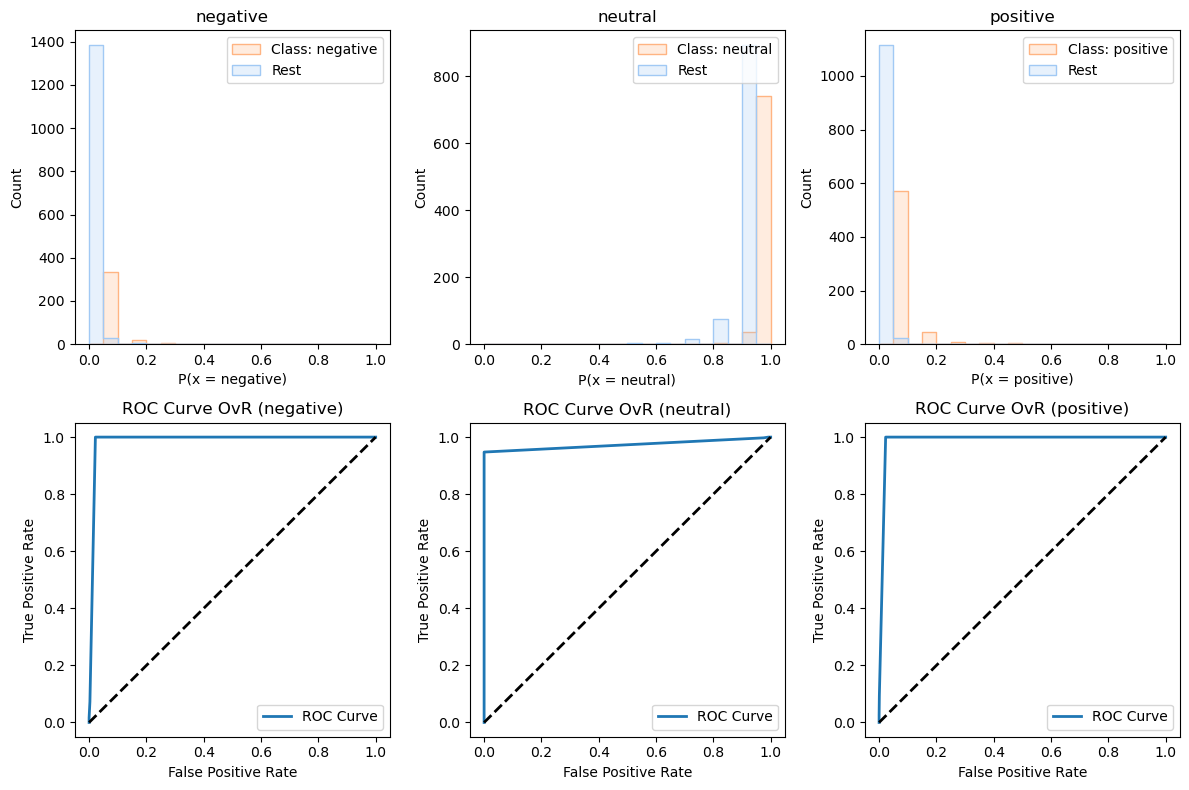

ROC AUC Scores (One-vs-Rest):
Class negative: 0.9884
Class neutral: 0.9731
Class positive: 0.9893


In [26]:
#Evaluation for KNN Classifier -> multi-class classification uses one-vs-rest
def get_all_roc_coordinates(y_true, y_proba):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    return tpr, fpr

def plot_roc_curve(tpr, fpr, scatter=True, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.plot(fpr, tpr, label="ROC Curve", lw=2)
    if scatter:
        ax.scatter(fpr, tpr, s=10)
    ax.plot([0, 1], [0, 1], "k--", lw=2)  # Random guessing line
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.legend(loc="lower right")

y_proba = knnmodel.predict_proba(X_test_tfidf)
y_test = train['Sentiment Type']
classes = knnmodel.classes_
plt.figure(figsize=(12, 8))
bins = [i / 20 for i in range(20)] + [1]
roc_auc_ovr = {}
for i in range(len(classes)):
    c = classes[i]
    df_aux = test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop=True)
    ax = plt.subplot(2, 3, i + 1)
    sns.histplot(x="prob", data=df_aux, hue='class', palette="pastel", ax=ax, bins=bins, element="step")
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    ax_bottom = plt.subplot(2, 3, i + 4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter=False, ax=ax_bottom)
    ax_bottom.set_title(f"ROC Curve OvR ({c})")
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()
plt.show()
print("ROC AUC Scores (One-vs-Rest):")
for cls, auc_score in roc_auc_ovr.items():
    print(f"Class {cls}: {auc_score:.4f}")

**Decision Tree**


*   Adjusting **max_depth_values** will change the accuracy of the model

*   The **max_depth** parameter is a hyperparameter that controls how deep the decision tree can grow. By testing with different values of **max_depth** ranging from **None** (unlimited depth) to **50**, we observed how the depth of the tree impacts its performance.
*   A balanced max_depth of **20** or **30** provided the best results, it allowed the model to capture enough complexity without overfitting.





In [28]:
from sklearn.tree import DecisionTreeClassifier

max_depth_values = [None, 1, 5, 10, 15, 20, 30]  # Example max_depth values I left it at highest 30

for depth in max_depth_values:
    dt_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    dt_model.fit(X_train_tfidf, y_train)
    y_train_pred = dt_model.predict(X_train_tfidf)
    accuracy = accuracy_score(y_train, y_train_pred)
    print(f"Decision Tree - max_depth: {depth}, Accuracy: {accuracy:.4f}")


y_train_pred = dt_model.predict(X_train_tfidf)
probability_predictions = dt_model.predict_proba(X_train_tfidf)

print('\nPredicted Probabilities for instance 1: {}\n'.format(probability_predictions[1]))
print('Actual: Is this a good review? {}\n'.format(y_train_pred[1]))
print(f'Actual Class for instance 1: {y_train.iloc[1]}')

print("\nTraining Accuracy:", accuracy_score(y_train, y_train_pred))
print("\nClassification Report on Training Data:")
print(classification_report(y_train, y_train_pred))

Decision Tree - max_depth: None, Accuracy: 1.0000
Decision Tree - max_depth: 1, Accuracy: 0.5096
Decision Tree - max_depth: 5, Accuracy: 0.5796
Decision Tree - max_depth: 10, Accuracy: 0.6710
Decision Tree - max_depth: 15, Accuracy: 0.7545
Decision Tree - max_depth: 20, Accuracy: 0.8138
Decision Tree - max_depth: 30, Accuracy: 0.9024

Predicted Probabilities for instance 1: [1. 0. 0.]

Actual: Is this a good review? negative

Actual Class for instance 1: negative

Training Accuracy: 0.9023702031602708

Classification Report on Training Data:
              precision    recall  f1-score   support

    negative       0.99      0.79      0.88       358
     neutral       0.82      1.00      0.90       782
    positive       1.00      0.85      0.92       632

    accuracy                           0.90      1772
   macro avg       0.94      0.88      0.90      1772
weighted avg       0.92      0.90      0.90      1772



**Evaluation for Decision Tree Classifier**

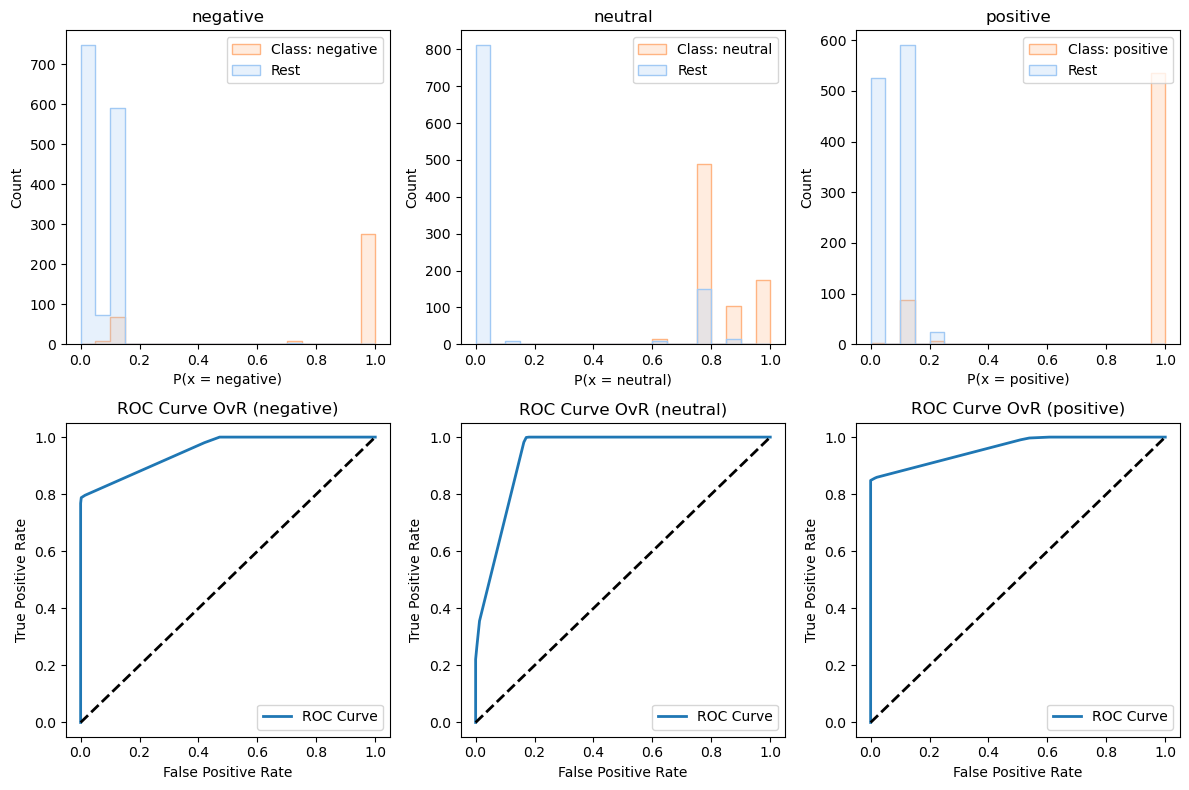

ROC AUC Scores (One-vs-Rest):
Class negative: 0.9511
Class neutral: 0.9407
Class positive: 0.9600


In [31]:
#Evaluation for Decision Tree Classifier -> multi-class classification uses one-vs-rest
def get_all_roc_coordinates(y_true, y_proba):
    fpr, tpr, _ = roc_curve(y_true, y_proba)
    return tpr, fpr

def plot_roc_curve(tpr, fpr, scatter=True, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.plot(fpr, tpr, label="ROC Curve", lw=2)
    if scatter:
        ax.scatter(fpr, tpr, s=10)
    ax.plot([0, 1], [0, 1], "k--", lw=2)  # Random guessing line
    ax.set_xlabel("False Positive Rate")
    ax.set_ylabel("True Positive Rate")
    ax.legend(loc="lower right")

y_proba = dt_model.predict_proba(X_test_tfidf)
y_test = train['Sentiment Type']
classes = dt_model.classes_
plt.figure(figsize=(12, 8))
bins = [i / 20 for i in range(20)] + [1]
roc_auc_ovr = {}
for i in range(len(classes)):
    c = classes[i]
    df_aux = test.copy()
    df_aux['class'] = [1 if y == c else 0 for y in y_test]
    df_aux['prob'] = y_proba[:, i]
    df_aux = df_aux.reset_index(drop=True)
    ax = plt.subplot(2, 3, i + 1)
    sns.histplot(x="prob", data=df_aux, hue='class', palette="pastel", ax=ax, bins=bins, element="step")
    ax.set_title(c)
    ax.legend([f"Class: {c}", "Rest"])
    ax.set_xlabel(f"P(x = {c})")
    ax_bottom = plt.subplot(2, 3, i + 4)
    tpr, fpr = get_all_roc_coordinates(df_aux['class'], df_aux['prob'])
    plot_roc_curve(tpr, fpr, scatter=False, ax=ax_bottom)
    ax_bottom.set_title(f"ROC Curve OvR ({c})")
    roc_auc_ovr[c] = roc_auc_score(df_aux['class'], df_aux['prob'])
plt.tight_layout()
plt.show()
print("ROC AUC Scores (One-vs-Rest):")
for cls, auc_score in roc_auc_ovr.items():
    print(f"Class {cls}: {auc_score:.4f}")